In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("/content/placement_data.csv")

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,7.00,93.8,0
1,1,6.36,108.7,0
2,2,7.15,109.9,0
3,3,8.02,103.0,1
4,4,6.27,112.6,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
df.shape

(100, 4)

In [9]:
df = df.iloc[:,1:]

In [10]:
df

,cgpa,iq,placement
0,7.00,93.8,0
1,6.36,108.7,0
2,7.15,109.9,0
3,8.02,103.0,1
4,6.27,112.6,0
...,...,...,...
95,5.04,120.8,0
96,6.80,101.7,1
97,6.76,117.3,0
98,6.51,115.9,0


In [11]:
import matplotlib.pyplot as plt


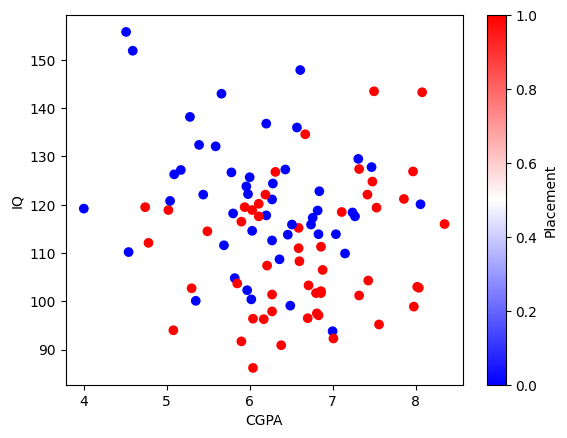

In [12]:
scatter = plt.scatter(df['cgpa'], df['iq'], c=df['placement'], cmap='bwr')  # blue-white-red
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.colorbar(scatter, label='Placement')
plt.show()

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,7.00,93.8
1,6.36,108.7
2,7.15,109.9
3,8.02,103.0
4,6.27,112.6
...,...,...
95,5.04,120.8
96,6.80,101.7
97,6.76,117.3
98,6.51,115.9


In [15]:
y

,placement
0,0
1,0
2,0
3,1
4,0
...,...
95,0
96,1
97,0
98,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [18]:
X_train

,cgpa,iq
94,6.11,117.6
13,4.59,151.9
83,5.98,122.2
26,5.35,100.1
87,6.83,113.9
...,...,...
64,7.31,129.5
41,6.67,134.6
93,6.17,96.3
72,6.46,113.8


In [19]:
y_train

,placement
94,1
13,0
83,0
26,0
87,0
...,...
64,0
41,1
93,1
72,0


In [20]:
X_test

,cgpa,iq
34,7.32,101.2
9,7.04,113.9
23,5.08,94.0
1,6.36,108.7
38,5.17,127.2
35,5.28,138.2
18,5.59,132.1
77,6.20,136.8
4,6.27,112.6
49,4.74,119.5


Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_train

array([[-0.38376816,  0.18382162],
       [-2.08829688,  2.60162025],
       [-0.52955022,  0.5080745 ],
       [-1.23603252, -1.04974911],
       [ 0.42364018, -0.07699048],
       [ 0.43485418,  0.55036835],
       [-0.55197823,  0.62085811],
       [ 0.45728219, -0.9369655 ],
       [ 0.17693207,  2.31966122],
       [-0.4622662 , -1.31056121],
       [ 1.24226253, -1.39514891],
       [ 0.04236402, -1.12023886],
       [ 0.78248833, -0.3589495 ],
       [ 0.88341437,  0.24021342],
       [-0.54076423, -0.89467165],
       [-1.52759665,  0.7970825 ],
       [-0.48469421, -1.02860218],
       [ 0.27785812, -1.30351223],
       [-0.20434409, -1.20482657],
       [ 0.16571807, -0.47173311],
       [-0.75383032,  0.8252784 ],
       [ 1.20862051,  0.31070318],
       [-0.15948807,  0.83232737],
       [ 1.75810674, -0.84532882],
       [-0.50712221,  0.75478864],
       [-1.29210255, -0.86647574],
       [ 1.08526646,  0.50102552],
       [ 1.09648046, -0.75369213],
       [ 1.15255049,

In [25]:
X_test = scaler.transform(X_test)

In [26]:
X_test

array([[ 0.97312641, -0.97221038],
       [ 0.65913428, -0.07699048],
       [-1.53881065, -1.47973662],
       [-0.10341804, -0.44353721],
       [-1.43788461,  0.86052328],
       [-1.31453056,  1.63591059],
       [-0.96689641,  1.20592308],
       [-0.28284212,  1.53722493],
       [-0.20434409, -0.16862716],
       [-1.92008681,  0.31775216]])

Training the Model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

In [30]:
# Model Training
clf.fit(X_train,y_train)

LogisticRegression()

Model Evaluation

In [36]:
y_pred = clf.predict(X_test)

In [32]:
y_test

,placement
34,1
9,0
23,1
1,0
38,0
35,0
18,0
77,0
4,0
49,1


In [33]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred)

0.6

In [38]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

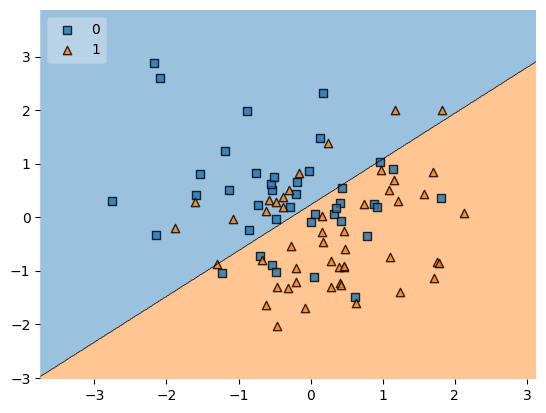

In [39]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf, open('model.pkl', 'wb'))